(f_rs_mosaic)=

----------------

```{admonition} Learning Objectives
- Create mosaics of more than one multiband image
- Find the intersection of two images
- View the footprint of multiple image tiles

```
```{admonition} Review
* [Opening Remotely Sensed Data](f_rs_io)
* [Raster Operations](e_raster_op_intro)
```
----------------
<!-- https://www.l3harrisgeospatial.com/docs/MosaicSeamless.html -->
<!-- 
https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/what-is-a-mosaic.htm -->

# Handle Multiple Remotely Sensed Images
Doing analysis over larger areas often requires the use of image mosaics (combining two or more images). Luckily for us geowombat makes this process relatively easy. 

## Union (Mosaic) of Remotely Sensed Image
As an example let's plot the union with `mosaic=True` of two images taken on the same day, for the overlapping portions we will use the mean pixel value by setting `overlap='mean'`, but blue band only. Alternatively we could use one of 'mean', 'min', or 'max'.

Note we rename the band name with `band_names=['blue']`.

/home/mmann1123/miniconda3/envs/pygisbookgw/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


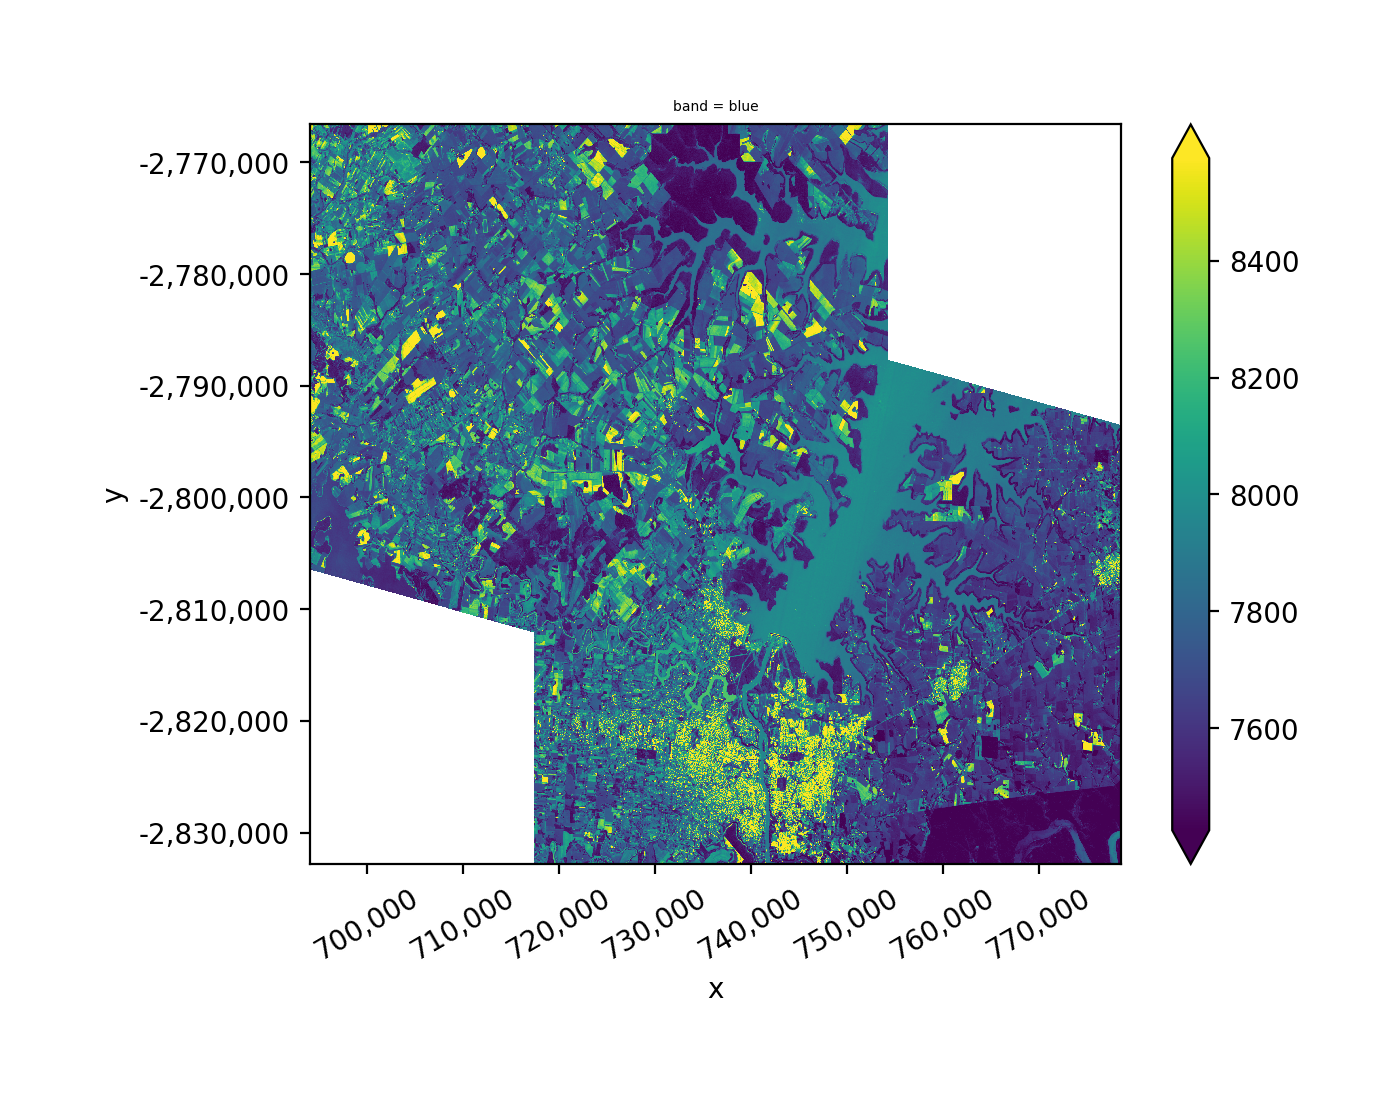

In [1]:
# Import GeoWombat
import geowombat as gw

# import plotting
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

# load data
from geowombat.data import l8_224077_20200518_B2, l8_224078_20200518_B2

fig, ax = plt.subplots(dpi=200)

with gw.open(
     [l8_224077_20200518_B2, l8_224078_20200518_B2],
     band_names=['blue'],
     mosaic=True,
     bounds_by='union'
 ) as src:
     src.where(src != 0).sel(band='blue').gw.imshow(robust=True, ax=ax)
 
plt.tight_layout(pad=1)

## Intersection of Remotely Sensed Image
Same idea with the intersection, using `bounds_by='intersection'`, we still need to mosaic the two images `mosaic=True`.

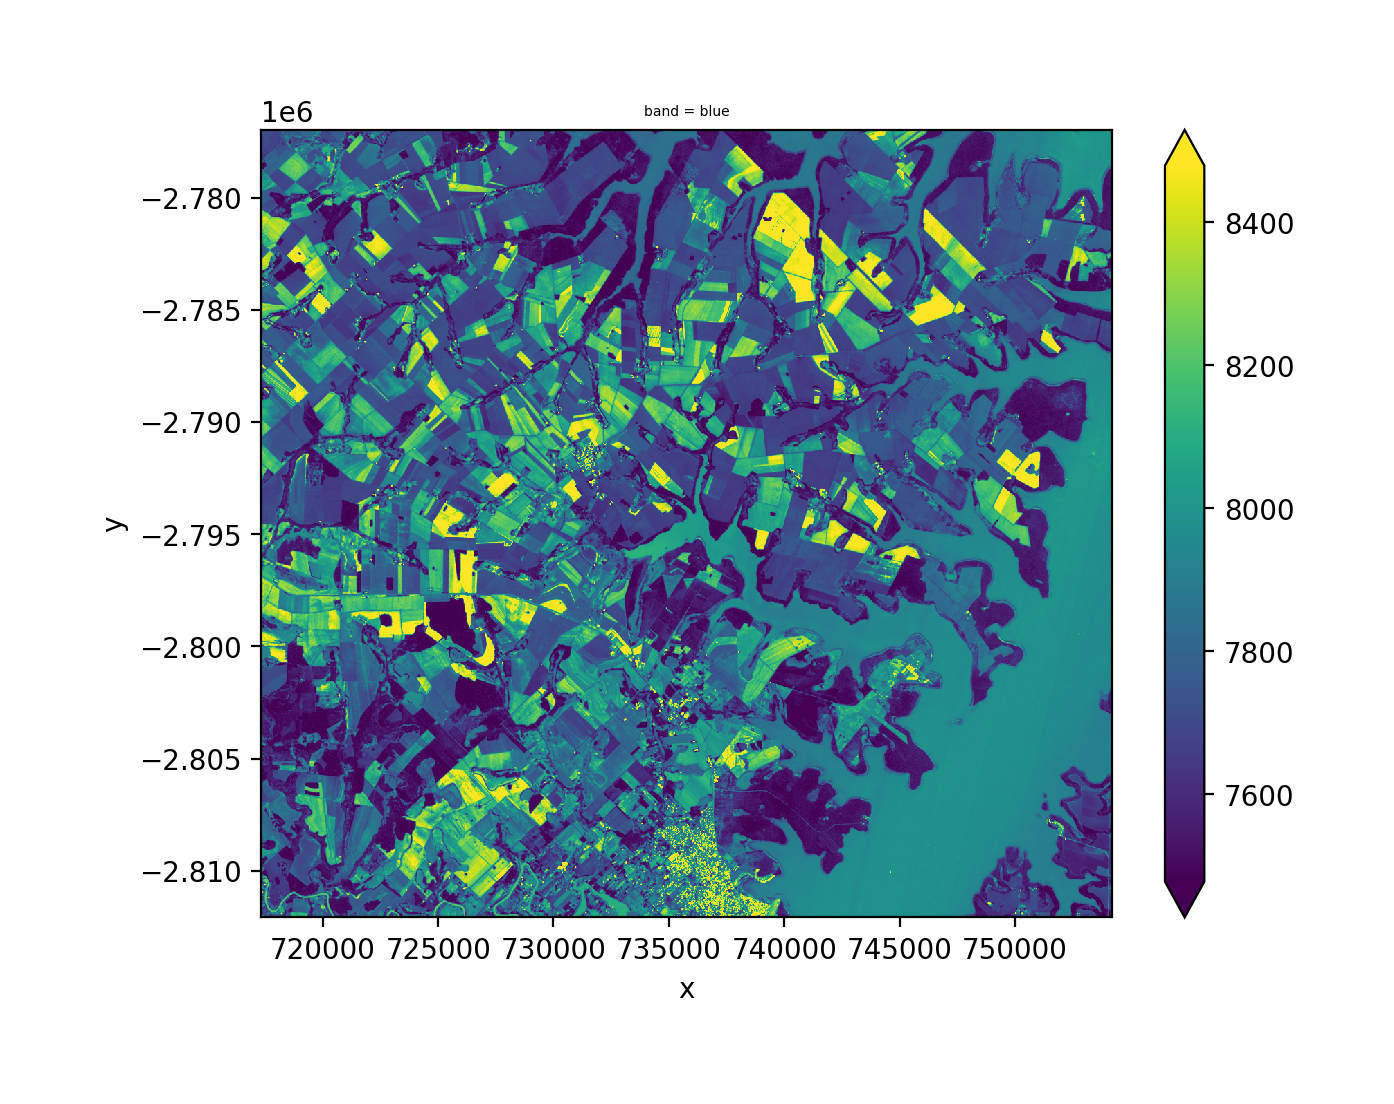

In [2]:
fig, ax = plt.subplots(dpi=200)
filenames = [l8_224077_20200518_B2, l8_224078_20200518_B2]
with gw.open(filenames,
                band_names=['blue'],
                mosaic=True,
                overlap='max',
                bounds_by='intersection') as src:
    src.where(src != 0).sel(band='blue').plot.imshow(robust=True, ax=ax)
plt.tight_layout(pad=1)